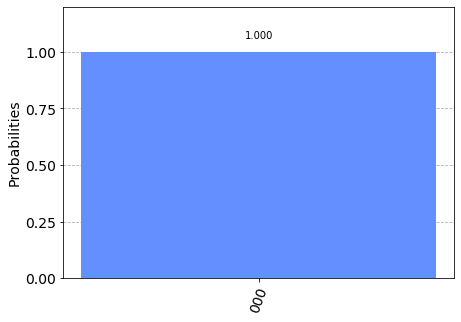

In [2]:
import random
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
from qiskit.visualization import plot_histogram

n = 2
binaryArray = [random.randint(0,1) for x in range(n + 1)]
q = QuantumRegister(n + 1)      # Create a quantum register with 5 qubits.
c = ClassicalRegister(n + 1)    # Create a classical register with 5 bits.
qc = QuantumCircuit(q, c)   # Create a quantum circuit, combining q and c.

qc.x(q[0])
qc.barrier()
qc.h(q)
qc.barrier()

binaryArray = binaryArray[::-1]

#Uf goes here
# 0 to n
if binaryArray[0] != 0:
    qc.x(q[0])

for i in range(1, n + 1, 1):
    if binaryArray[i] != 0:
        qc.cx(q[i], q[0])


# n to 0
# for i in range(n, 0, -1):
#     if binaryArray[i] != 0:
#         qc.cx(q[i], q[0])
        
# if binaryArray[0] != 0:
#     qc.x(q[0])


#end Uf

qc.barrier()
qc.h(q)
for i in range(1, n + 1):
    qc.measure(q[i],c[i])
    
# print(binaryArray)
# qc.draw(output = "mpl")

backend = Aer.get_backend('qasm_simulator')

counts = execute(qc, backend, shots=1024).result().get_counts(qc)

plot_histogram(counts)

# if measurement is all 0s, function is constant, else function is balanced

